In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('height_weight.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
 2   weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
#df.isna().sum()

In [5]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Hist of height

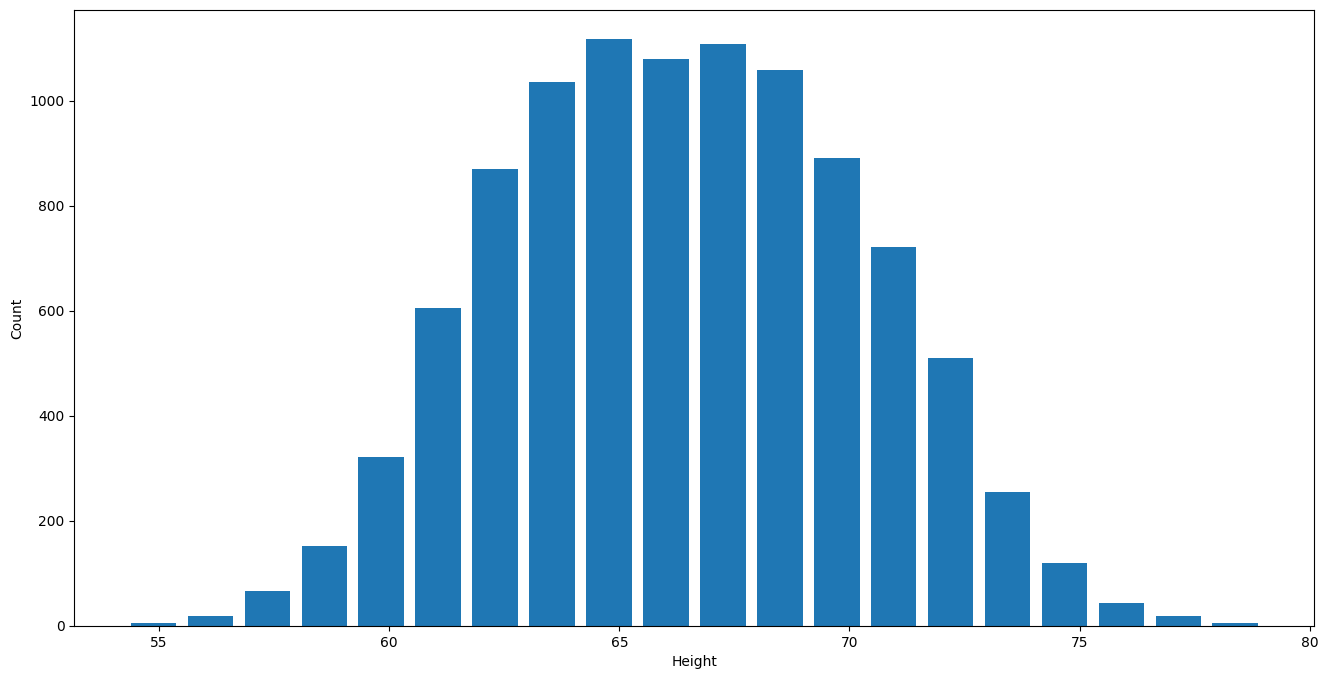

In [10]:
plt.figure(figsize=(16, 8))
plt.hist(df['height'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [45]:
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)
q1, q3

(63.505620481218955, 69.1742617268347)

In [46]:
iqr = q3 - q1 
iqr

5.668641245615746

In [48]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
lower, upper

(55.00265861279534, 77.67722359525831)

In [49]:
df.shape

(10000, 3)

In [51]:
df[(df['height'] < lower) | (df['height'] > upper)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [53]:
height_no_outliers = df[(df['height'] < upper) & (df['height'] > lower)]
height_no_outliers

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


#### Hist of weight

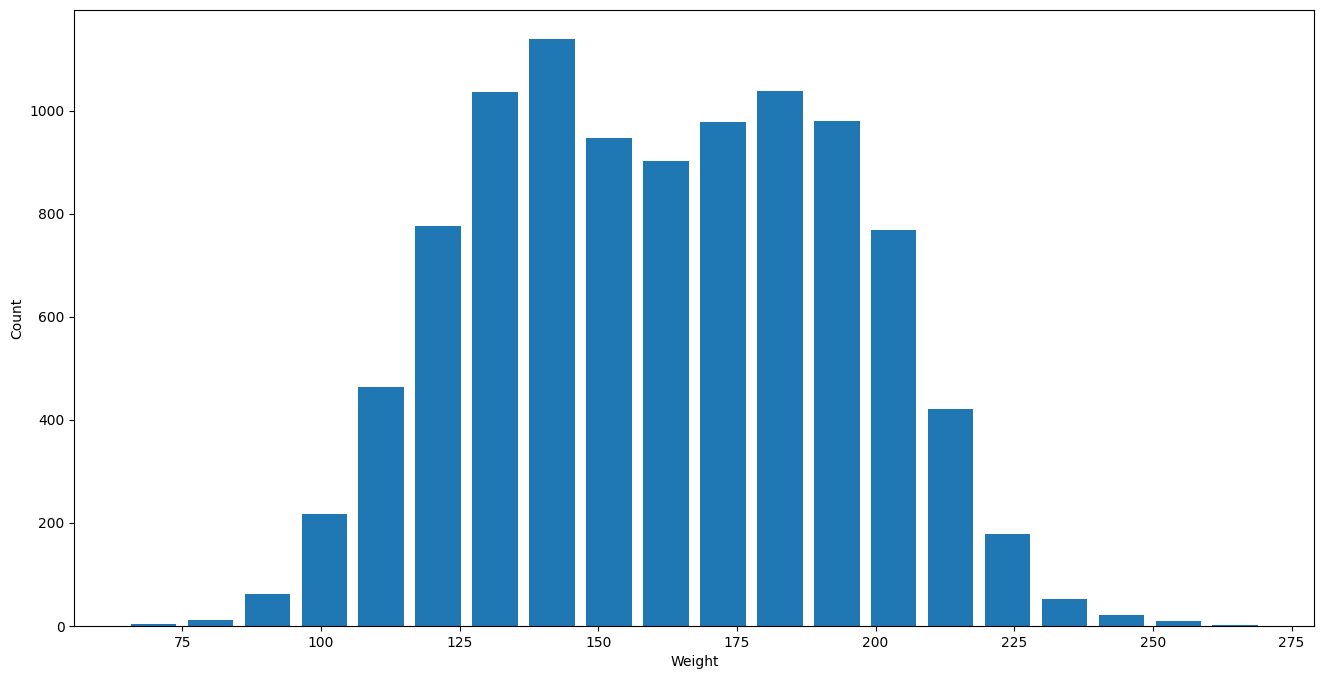

In [35]:
plt.figure(figsize=(16, 8))
plt.hist(df['weight'], bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [34]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [36]:
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)
q1, q3

(135.8180513055015, 187.16952486868348)

In [37]:
iqr = q3 - q1
iqr

51.35147356318197

In [38]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound, upper_bound

(58.79084096072856, 264.19673521345646)

In [39]:
df.shape

(10000, 3)

In [40]:
df[(df['weight'] > upper_bound) | (df['weight'] < lower_bound)]

,gender,height,weight
2014,Male,78.998742,269.989699


In [43]:
weight_no_outliers = df[(df['weight'] > lower_bound) & (df['weight'] < upper_bound)]
weight_no_outliers

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
